In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
%ls data

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 2C12-07DF

 C:\Users\user\Jupyter_python\인프런\서울시 아파트\data 디렉터리

2020-11-15  오후 03:16    <DIR>          .
2020-11-15  오후 03:16    <DIR>          ..
2020-11-15  오후 03:15           171,938 전국 신규 민간 아파트 분양가격 동향_20200331.csv
               1개 파일             171,938 바이트
               2개 디렉터리  71,885,053,952 바이트 남음


In [49]:
df = pd.read_csv('data/전국 신규 민간 아파트 분양가격 동향_20200331.csv', encoding="cp949", engine="python")
df.shape

(4590, 5)

In [50]:
df.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [51]:
df.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    305
dtype: int64

In [52]:
df['분양가격'] = pd.to_numeric(df['분양가격(㎡)'], errors='coerce')
df['분양가격'].head(1)

0    5841.0
Name: 분양가격, dtype: float64

In [53]:
df['평당분양가격'] = df['분양가격'] * 3.3 
df.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4590 non-null   object 
 1   규모구분     4590 non-null   object 
 2   연도       4590 non-null   int64  
 3   월        4590 non-null   int64  
 4   분양가격(㎡)  4285 non-null   object 
 5   분양가격     4184 non-null   float64
 6   평당분양가격   4184 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 251.1+ KB


In [55]:
df['분양가격(㎡)'].describe()

count     4285
unique    1813
top       3395
freq        18
Name: 분양가격(㎡), dtype: object

In [56]:
df['분양가격'].describe()

count     4184.000000
mean      3271.654876
std       1302.987924
min       1868.000000
25%       2457.500000
50%       2894.000000
75%       3601.250000
max      13835.000000
Name: 분양가격, dtype: float64

In [57]:
df["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [58]:
df['규모구분'].value_counts()

전용면적 102㎡초과          918
전체                   918
전용면적 60㎡이하           918
전용면적 60㎡초과 85㎡이하     918
전용면적 85㎡초과 102㎡이하    918
Name: 규모구분, dtype: int64

In [61]:
df['전용면적'] = df['규모구분'].str.replace('전용면적', '')
df['전용면적'] = df['전용면적'].str.replace('초과', '~')
df['전용면적'] = df['전용면적'].str.replace('이하', '')
df['전용면적'] = df['전용면적'].str.replace(' ','')

In [62]:
df.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7,102㎡~


In [64]:
df = df.drop(['분양가격(㎡)', '규모구분'], axis=1)
df.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4590 non-null   object 
 1   연도      4590 non-null   int64  
 2   월       4590 non-null   int64  
 3   분양가격    4184 non-null   float64
 4   평당분양가격  4184 non-null   float64
 5   전용면적    4590 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 215.3+ KB


In [66]:
df.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7986.180469
경기    13512.690566
경남     9301.540541
경북     8410.265217
광주    10131.759155
대구    12143.512062
대전    10357.847368
부산    12162.567170
서울    24018.284151
세종     9892.710843
울산    10049.460759
인천    12031.559770
전남     7639.613793
전북     7768.639163
제주    11324.042857
충남     8280.609449
충북     7663.969811
Name: 평당분양가격, dtype: float64

In [67]:
df.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11642.116000
60㎡         10466.235161
60㎡~85㎡     10361.733632
85㎡~102㎡    11271.432473
전체          10367.752803
Name: 평당분양가격, dtype: float64

In [70]:
df.groupby(['전용면적', '지역명'])['평당분양가격'].mean()

전용면적   지역명
102㎡~  강원      8569.601887
       경기     14899.624528
       경남     10358.363265
       경북      9197.411321
       광주     11280.142500
                  ...     
전체     전남      7342.437736
       전북      7340.818868
       제주     10913.286792
       충남      7861.845283
       충북      7252.466038
Name: 평당분양가격, Length: 85, dtype: float64

In [72]:
df.groupby(['전용면적', '지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8570.0,14900.0,10358.0,9197.0,11280.0,13302.0,14875.0,13268.0,23791.0,10269.0,9974.0,14473.0,8316.0,8228.0,10604.0,8728.0,8218.0
60㎡,7614.0,13420.0,8718.0,7919.0,9651.0,12117.0,9335.0,11412.0,23459.0,9324.0,9391.0,11354.0,7284.0,7651.0,13971.0,7909.0,7147.0
60㎡~85㎡,7523.0,12635.0,8697.0,8113.0,10071.0,11942.0,9817.0,11929.0,23018.0,9856.0,10487.0,11510.0,7329.0,7319.0,10760.0,7869.0,7294.0
85㎡~102㎡,8851.0,13920.0,10057.0,8774.0,9296.0,11292.0,9037.0,12211.0,26991.0,9946.0,8861.0,11616.0,7950.0,8326.0,10709.0,9221.0,8408.0
전체,7520.0,12688.0,8735.0,8131.0,10061.0,11935.0,9896.0,11993.0,22832.0,9896.0,10484.0,11389.0,7342.0,7341.0,10913.0,7862.0,7252.0


In [73]:
df.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [77]:
df.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0,11061.0,8459.0,7464.0,7917.0,9019.0,8191.0,10377.0,20316.0,8765.0,9368.0,10976.0,6799.0,7110.0,7951.0,7690.0,6829.0
2016,7163.0,11685.0,8497.0,7753.0,9191.0,10282.0,8911.0,10744.0,21753.0,8858.0,9583.0,11099.0,6937.0,6907.0,9567.0,7958.0,7133.0
2017,7274.0,12305.0,8787.0,8281.0,9614.0,12207.0,9957.0,11561.0,21831.0,9133.0,10667.0,11641.0,7373.0,7399.0,12567.0,8198.0,7473.0
2018,8219.0,14258.0,9328.0,8681.0,9527.0,12139.0,10234.0,12890.0,23202.0,10340.0,10241.0,11882.0,7930.0,8175.0,11936.0,8202.0,8149.0
2019,8934.0,15666.0,10698.0,9050.0,12112.0,14082.0,12619.0,13538.0,28287.0,11299.0,10216.0,13250.0,8219.0,8532.0,11828.0,8749.0,7971.0
2020,9636.0,16109.0,9976.0,9088.0,13150.0,14767.0,12239.0,13420.0,30990.0,11793.0,10622.0,13938.0,9057.0,8503.0,12835.0,9029.0,8153.0


In [80]:
pd.pivot_table(df, index=['지역명'], values=['평당분양가격'], aggfunc='mean')

,평당분양가격
지역명,
강원,7986.180469
경기,13512.690566
경남,9301.540541
경북,8410.265217
광주,10131.759155
대구,12143.512062
대전,10357.847368
부산,12162.567170
서울,24018.284151


In [82]:
pd.pivot_table(df, index=['전용면적'], values=['평당분양가격'])

,평당분양가격
전용면적,
102㎡~,11642.116000
60㎡,10466.235161
60㎡~85㎡,10361.733632
85㎡~102㎡,11271.432473
전체,10367.752803


In [90]:
p = pd.pivot_table(df, index=['연도', '지역명'], values=['평당분양가격'])
p.loc[2019]

,평당분양가격
지역명,
강원,8934.475000
경기,15665.540000
경남,10697.615789
경북,9050.250000
광주,12111.675000
대구,14081.650000
대전,12619.200000
부산,13537.865000
서울,28286.830000


In [87]:
p.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


In [91]:
plt.rc('font', family='Malgun Gothic')

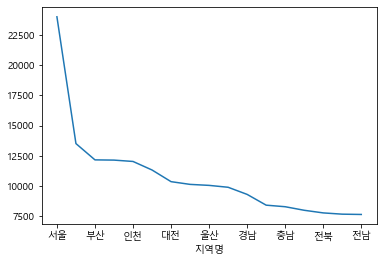

In [92]:
g = df.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
g.plot()

In [101]:
mean = df['평당분양가격'].mean()
median = df['평당분양가격'].median()

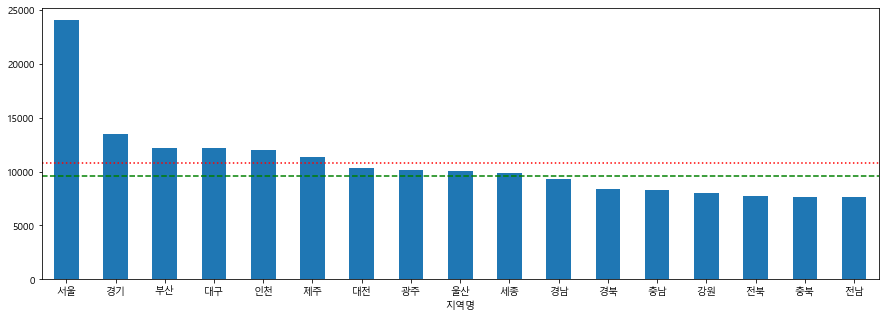

In [102]:
g.plot.bar(rot=0, figsize=(15,5))
plt.axhline(mean, color= 'r', linestyle=':')
plt.axhline(median, color= 'g', linestyle='--')

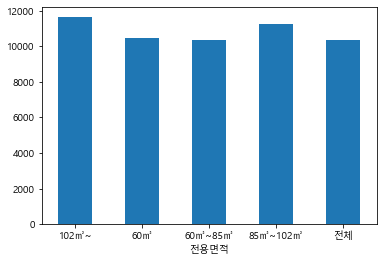

In [104]:
df.groupby(['전용면적'])['평당분양가격'].mean().plot.bar(rot=0)

In [107]:
from matplotlib.ticker import MaxNLocator

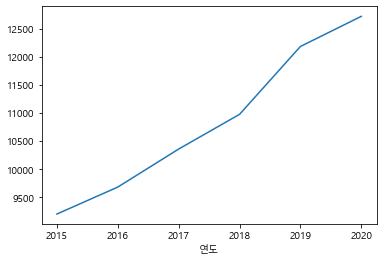

In [113]:
ax = plt.figure().gca()
df.groupby(['연도'])['평당분양가격'].mean().plot()

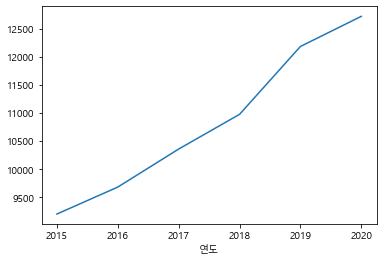

In [112]:
ax = plt.figure().gca()
df.groupby(['연도'])['평당분양가격'].mean().plot()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [114]:
df.pivot_table(index='월', columns='연도', values='평당분양가격')

연도,2015,2016,2017,2018,2019,2020
월,,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789,12718.243421
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421,12717.896053
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737,12739.188000
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000,NaN
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737,NaN
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000,NaN
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000,NaN
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000,NaN
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429,NaN


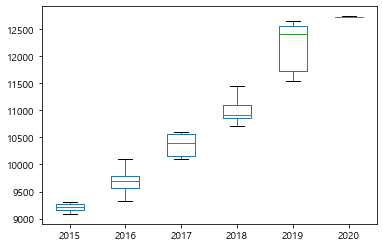

In [115]:
df.pivot_table(index='월', columns='연도', values='평당분양가격').plot.box()

In [116]:
df.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


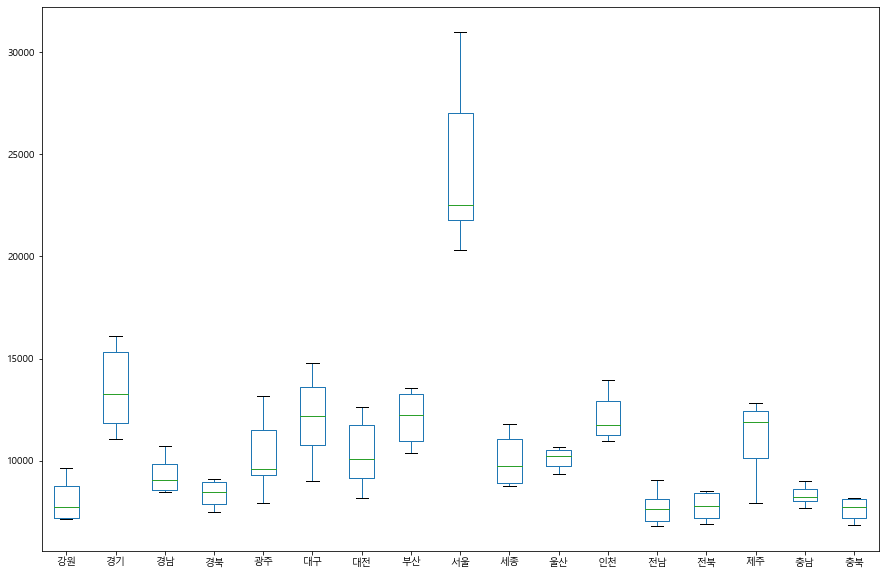

In [121]:
p = df.pivot_table(index='연도', columns='지역명', values='평당분양가격')
p.plot.box(figsize=(15,10), rot=0)

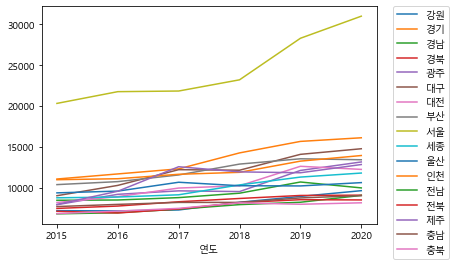

In [123]:
p.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [124]:
import seaborn as sns

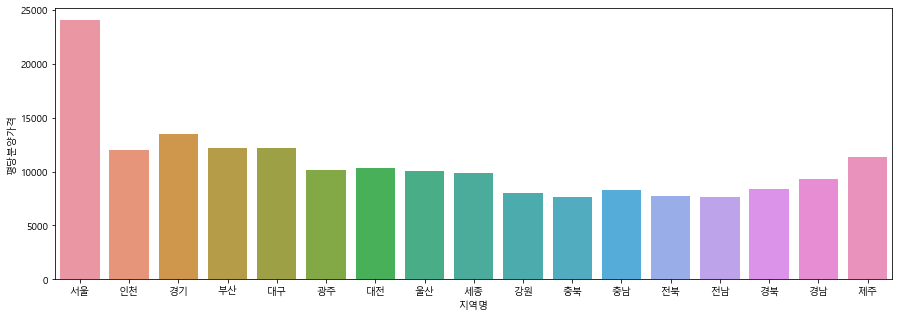

In [125]:
plt.figure(figsize=(15,5))
sns.barplot(data= df, x='지역명', y='평당분양가격', ci=None)

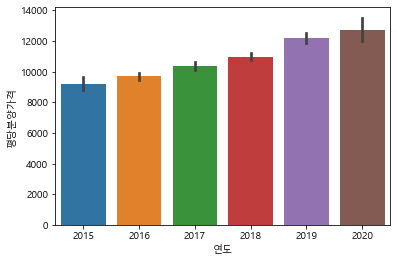

In [126]:
sns.barplot(data=df, x='연도', y= '평당분양가격')

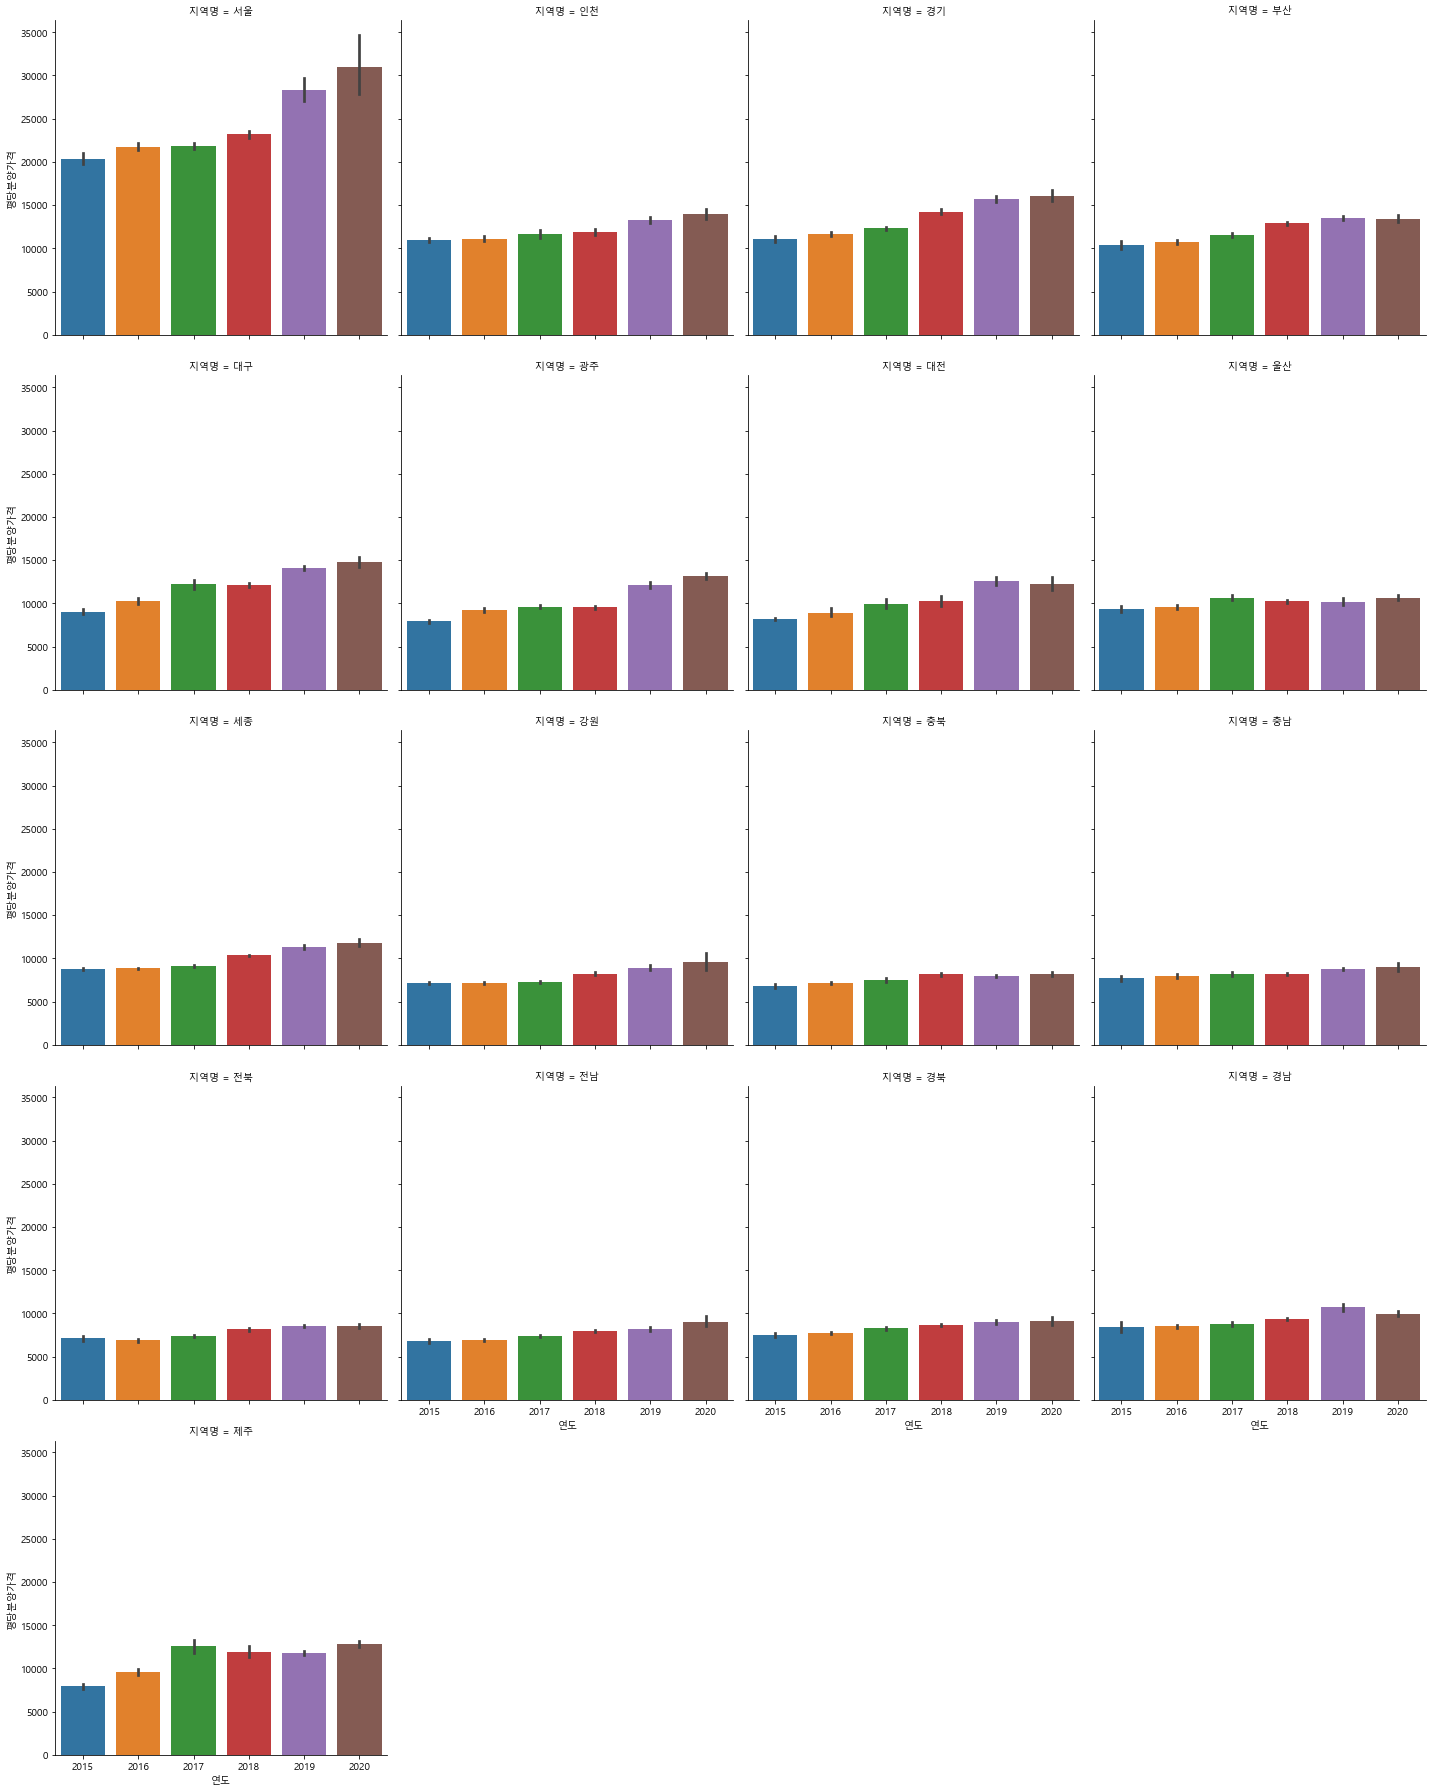

In [129]:
sns.catplot(data = df, x='연도', y='평당분양가격', kind='bar', col='지역명', col_wrap=4)

In [131]:
df.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


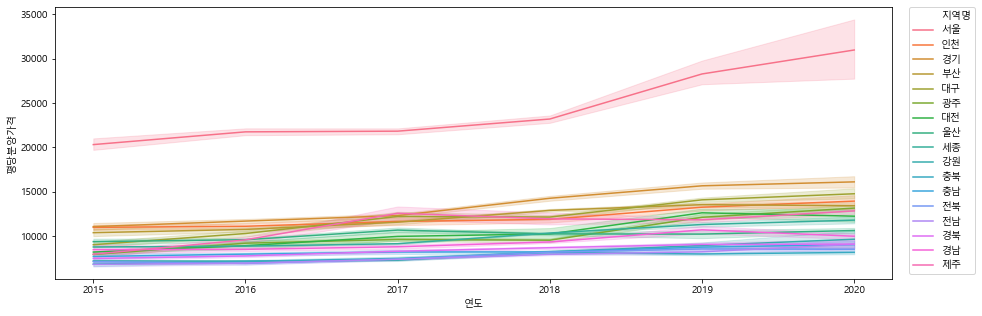

In [136]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='연도', y ='평당분양가격', hue='지역명')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

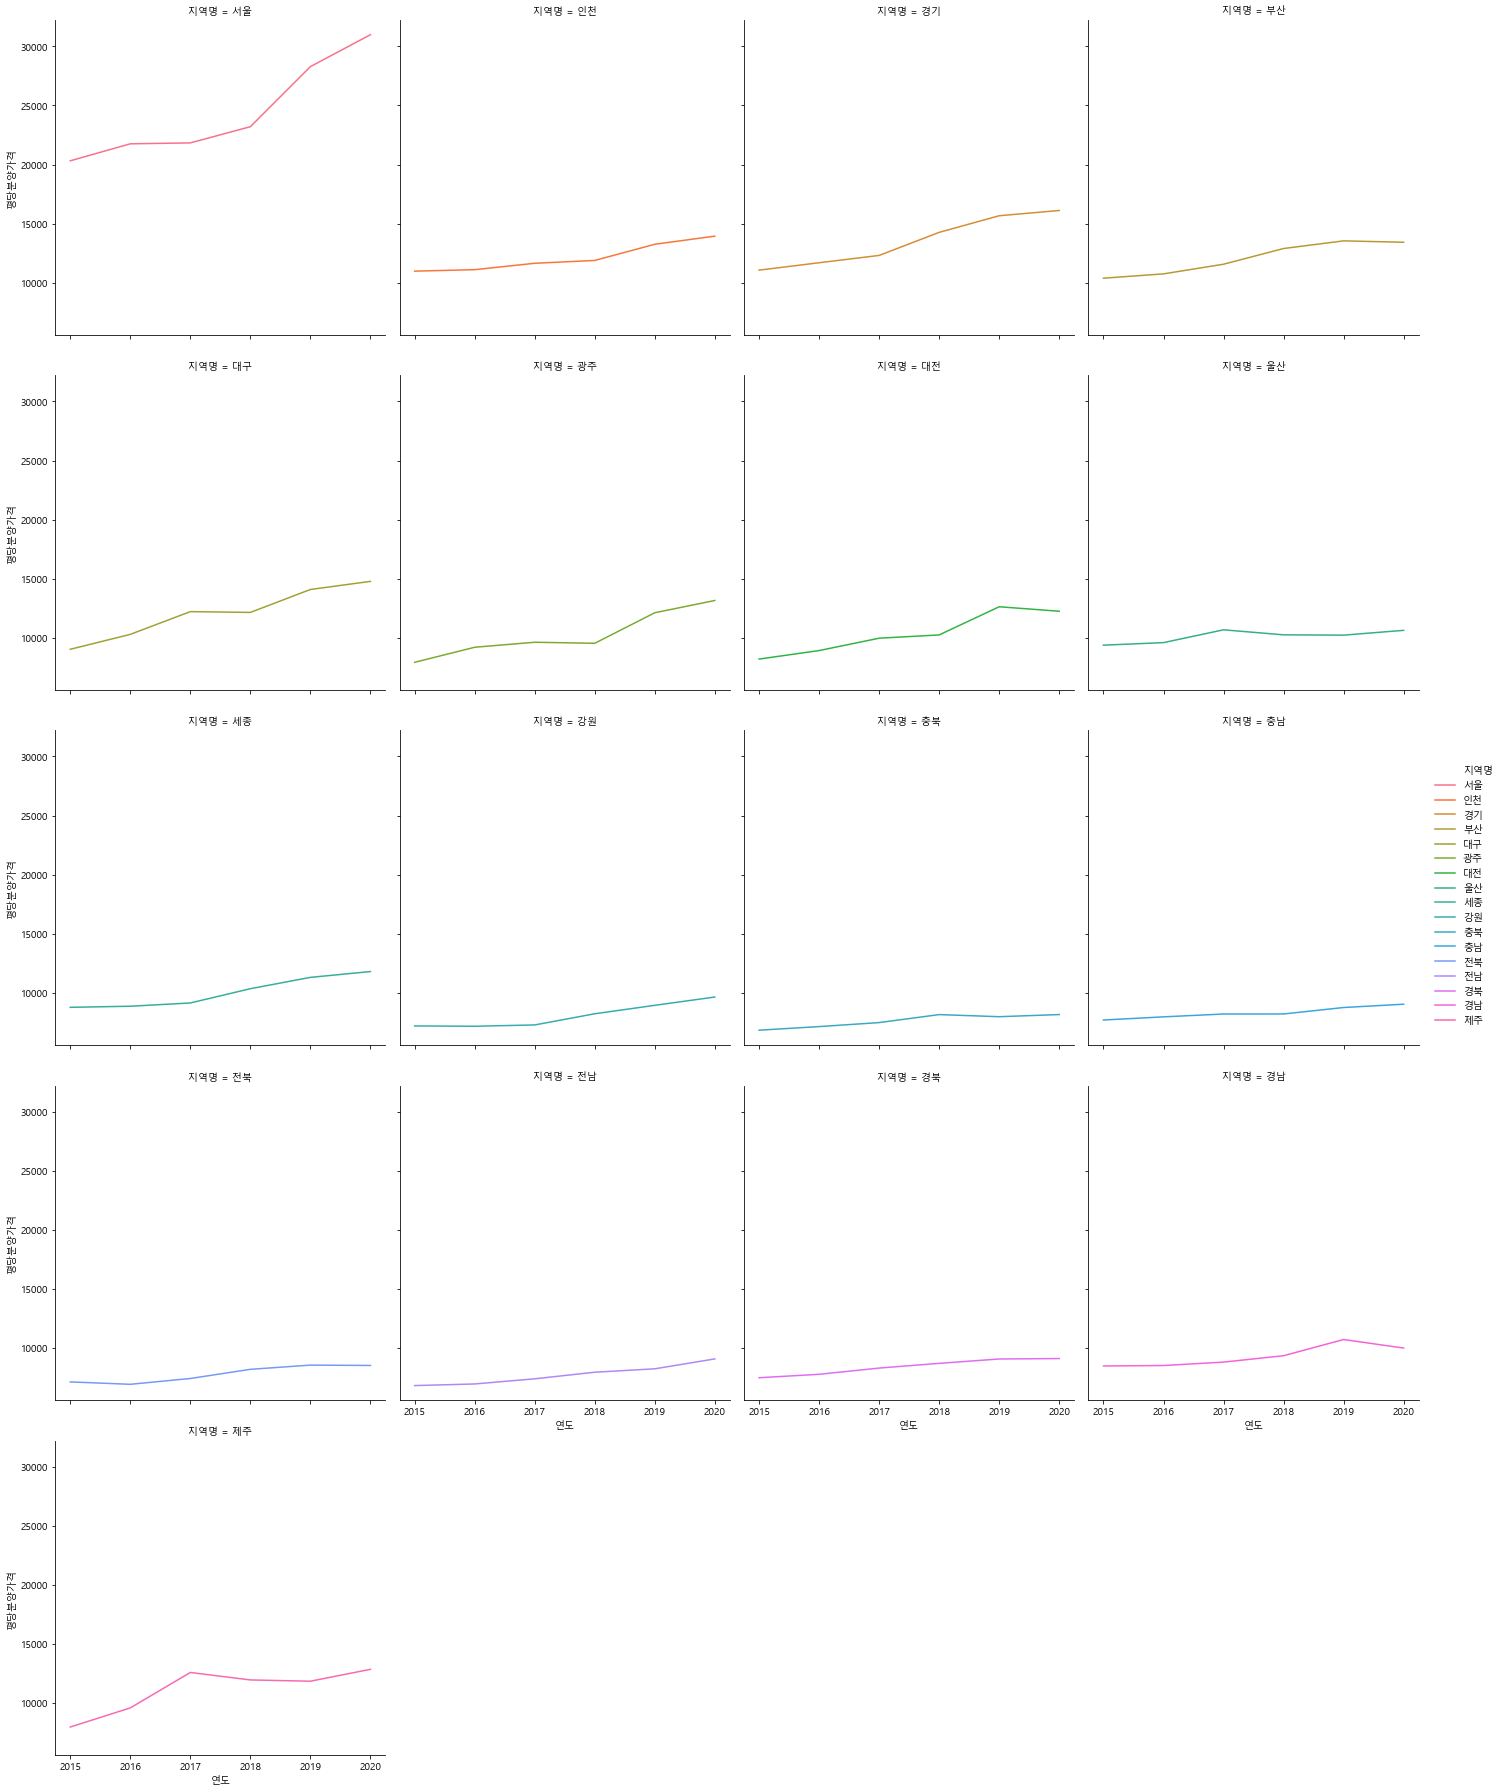

In [139]:
sns.relplot(data=df, x='연도', y='평당분양가격', hue='지역명', kind='line', col='지역명', col_wrap=4, ci=None)

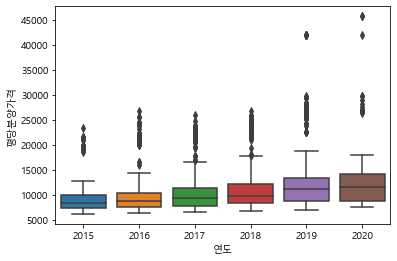

In [140]:
sns.boxplot(data=df, x='연도', y='평당분양가격')

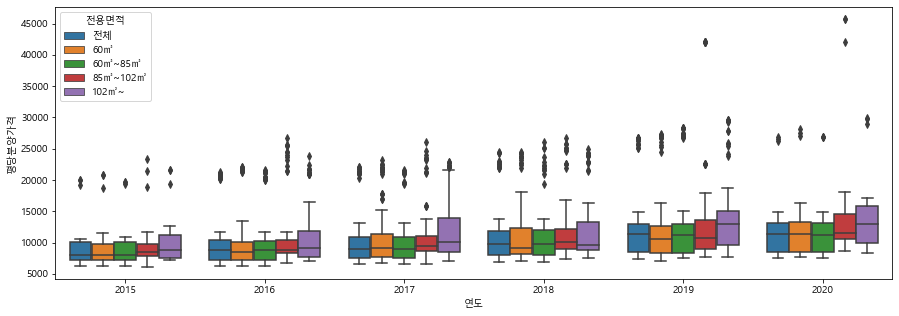

In [141]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='연도', y='평당분양가격', hue='전용면적')

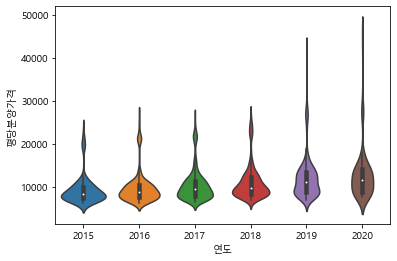

In [143]:
sns.violinplot(data=df, x='연도', y='평당분양가격')

In [144]:
df['연도'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

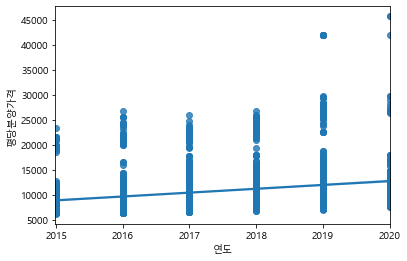

In [146]:
sns.regplot(data=df, x='연도', y='평당분양가격')

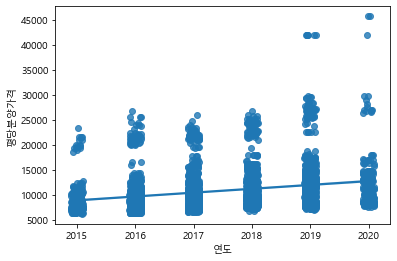

In [150]:
sns.regplot(data=df, x='연도', y= '평당분양가격', x_jitter=.1)

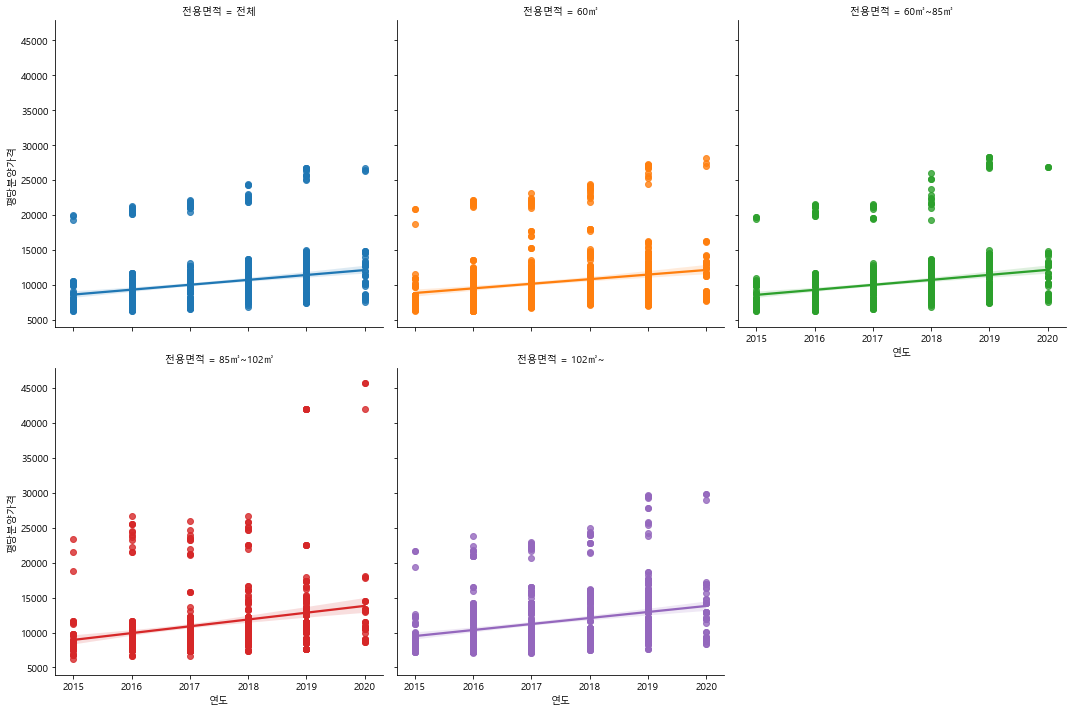

In [153]:
sns.lmplot(data=df, x='연도', y='평당분양가격', hue='전용면적', col='전용면적', col_wrap=3)

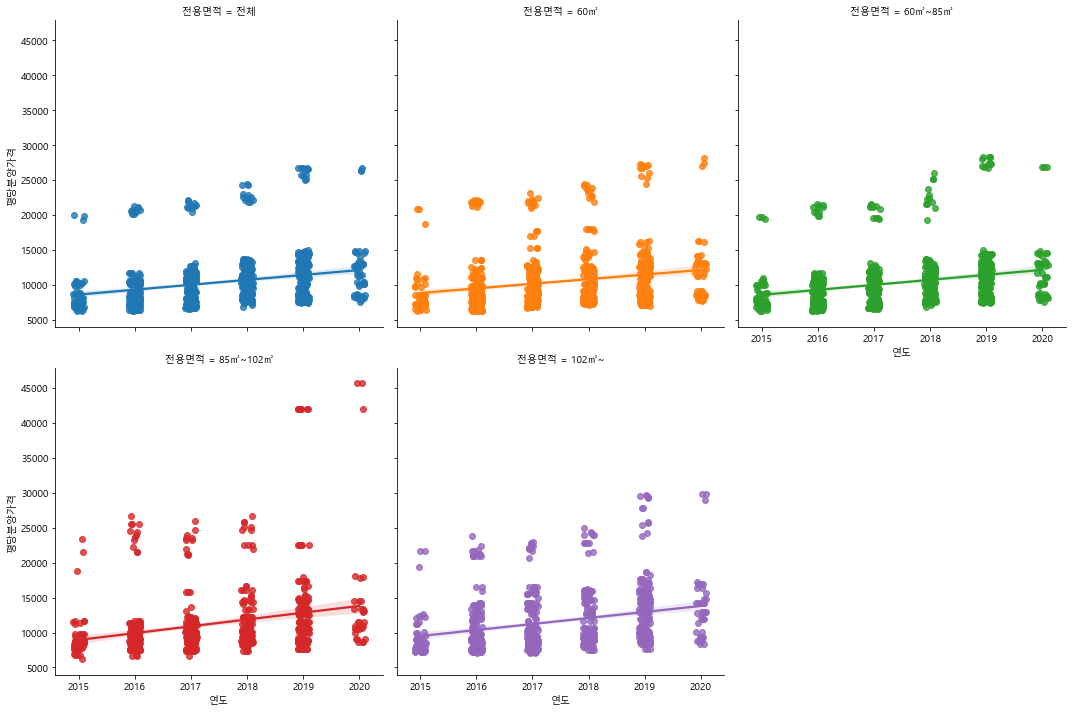

In [154]:
sns.lmplot(data=df, x='연도', y='평당분양가격', hue='전용면적', col='전용면적', col_wrap=3, x_jitter=.1)